In [1]:
## 导入各种库
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from torchvision import datasets
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 下载数据并将所有数据转换为 𝐓𝐞𝐧𝐬𝐨𝐫 ，train为是否训练数据集，download默认网上下载
data_path=r'E:\STUDYCONTENT\Pycharm\DeepLearningExp'
mnist_train = torchvision.datasets.FashionMNIST(data_path, train=True, download=False, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(data_path, train=False, download=False, transform=transforms.ToTensor())



In [3]:
# 通过 𝐃𝐚𝐭𝐚𝐋𝐨𝐚𝐝𝐞𝐫 读取小批量数据样本，shuffle是否打乱顺序，num_workers为进程的个数
batch_size = 128
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=0)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=0)
len(train_iter)

469

In [4]:
## 参数初始化
num_inputs = 784# 拉成向量的长度
num_hiddens=256 #隐藏层的神经元数
num_outputs = 10# 分类的类别个数
W1 = torch.normal(0, 0.01, size=(num_inputs, num_hiddens))# 权重的高斯随机初始化
b1 = torch.zeros(num_hiddens)                             # 偏移的随机初始化
W2 = torch.normal(0, 0.01, size=(num_hiddens, num_outputs))# 权重的高斯随机初始化
b2 = torch.zeros(num_outputs)
params=[W1,b1,W2,b2]

for param in params:
    param.requires_grad_(requires_grad=True)

In [5]:
#选用常用ReLU作为激活函数
#def relu(z):
 #   z=np.where(z>0,z,0)
 #   return  torch.tensor(z)
def relu(X): # 激活函数
    return torch.max(input=X, other=torch.tensor(0.0))
    # 使用基础的max函数来实现ReLU，而非直接调用relu函数

def tanh(X):
    torch.tanh(X)

def sigmoid(X):
    return torch.sigmoid(X)

In [6]:
## 网络
# 定义Softmax
def softmax(X):
    return torch.exp(X) / torch.exp(X).sum()  # 这里应用了广播机制


In [7]:
# 定义网络模型

def net(X): # 定义模型结构
    X = X.view((-1, num_inputs)) # view函数将每张原始图像改成长度为num_inputs的向量
    H = sigmoid(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2
#    return nn.LogSoftmax(torch.matmul(H, W2) + b2)


In [8]:
## 交叉熵损失
loss = torch.nn.CrossEntropyLoss() # 损失函数
## 交叉熵损失
#loss=nn.NLLloss()

In [9]:
## 梯度下降
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size  # 注意这里更改param时用的param.data

In [10]:
#计算模型在某个数据集上的准确率
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (softmax(net(X)).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n


In [11]:
#定义模型训练函数
def train(net, train_iter, test_iter, num_epochs, batch_size,
              params, optimizer = None):
    train_set, test_set = [], []
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y_hat in train_iter:
            y = net(X)
            yt=softmax(y)
            l = loss(y,y_hat).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad() # 这里我们用到优化器，所以直接对优化器行梯度清零
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step()  # 用到优化器这里


            train_l_sum += l.item()
            train_acc_sum += (yt.argmax(dim=1) == y_hat).sum().item()
            n += y_hat.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

        # 记录loss
        train_item, test_item =  float(train_l_sum/n), float(test_acc)
        train_set.append(train_item)
        test_set.append(test_item)

    return train_set, test_set

In [12]:
# 模型loss画图
def plot_loss(train_loss, val_loss):
    epochs = len(train_loss)
    x = range(epochs)
    plt.plot(x, train_loss, label='Train')
    plt.plot(x, val_loss, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

epoch 1, loss 0.0180, train acc 0.110, test acc 0.103
epoch 2, loss 0.0180, train acc 0.150, test acc 0.112
epoch 3, loss 0.0179, train acc 0.200, test acc 0.343
epoch 4, loss 0.0179, train acc 0.223, test acc 0.404
epoch 5, loss 0.0179, train acc 0.351, test acc 0.483
epoch 6, loss 0.0179, train acc 0.422, test acc 0.484
epoch 7, loss 0.0178, train acc 0.439, test acc 0.451
epoch 8, loss 0.0178, train acc 0.457, test acc 0.424
epoch 9, loss 0.0177, train acc 0.474, test acc 0.530
epoch 10, loss 0.0177, train acc 0.489, test acc 0.628
epoch 11, loss 0.0176, train acc 0.535, test acc 0.489
epoch 12, loss 0.0176, train acc 0.497, test acc 0.485
epoch 13, loss 0.0175, train acc 0.512, test acc 0.558
epoch 14, loss 0.0174, train acc 0.527, test acc 0.531
epoch 15, loss 0.0173, train acc 0.542, test acc 0.543
epoch 16, loss 0.0172, train acc 0.520, test acc 0.526
epoch 17, loss 0.0170, train acc 0.536, test acc 0.478
epoch 18, loss 0.0169, train acc 0.503, test acc 0.520
epoch 19, loss 0.01

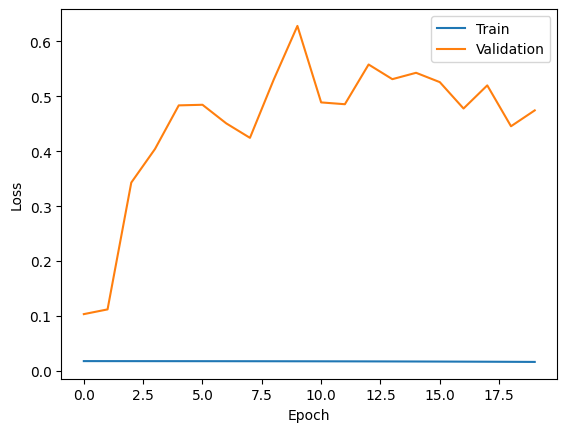

In [13]:
## 模型训练
lr = 0.1
num_epochs = 20 # 迭代次数
trains, tests = train(net, train_iter, test_iter,  num_epochs, batch_size, params)

plot_loss(trains, tests)